<a href="https://colab.research.google.com/github/mahmoudarekat/ChicagoCrime/blob/main/ChicagoCrime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import pandas as pd
from google.colab import drive
folder = "/content/drive/MyDrive/DS Coding Dojo/ChicagoCrime/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])


In [2]:
df['Date']=pd.to_datetime(df['Date'])

In [3]:
df=df.set_index('Date')

In [5]:
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Count
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041.0,BATTERY,SIMPLE,RESIDENCE,False,False,1624.0,16.0,NaN,41.957850,-87.749185,NaN
2001-01-01 13:00:00,1319931.0,BATTERY,SIMPLE,RESIDENCE,False,True,825.0,8.0,NaN,41.783892,-87.684841,NaN
2001-01-01 13:00:00,1324743.0,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313.0,3.0,NaN,41.780412,-87.611970,NaN
2001-01-01 01:00:00,1310717.0,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424.0,24.0,NaN,42.012391,-87.678032,NaN
2001-01-01 01:00:00,1318099.0,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214.0,2.0,NaN,41.819538,-87.620020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 00:00:00,NaN,WEAPONS VIOLATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5456.0
2019-12-31 00:00:00,NaN,WEAPONS VIOLATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6339.0
2020-12-31 00:00:00,NaN,WEAPONS VIOLATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8432.0


In [19]:
df['Primary Type'].unique()
df['Primary Type']=df['Primary Type'].replace('NON - CRIMINAL','NON-CRIMINAL')
df['Primary Type']=df['Primary Type'].replace('NON-CRIMINAL (SUBJECT SPECIFIED)','NON-CRIMINAL')
df['Primary Type']=df['Primary Type'].replace('OTHER NARCOTIC VIOLATION','NARCOTICS')
df['Primary Type']=df['Primary Type'].replace('CRIM SEXUAL ASSAULT','CRIMINAL SEXUAL ASSAULT')



In [20]:
df['Primary Type'].unique()


array(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS',
       'CRIMINAL SEXUAL ASSAULT', 'DECEPTIVE PRACTICE',
       'WEAPONS VIOLATION', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'BURGLARY', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING',
       'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING'], dtype=object)

In [29]:
df.duplicated().sum()

84

In [30]:
df=df.drop_duplicates(keep='first')

In [31]:
df2022=df.loc['2022']

<Axes: >

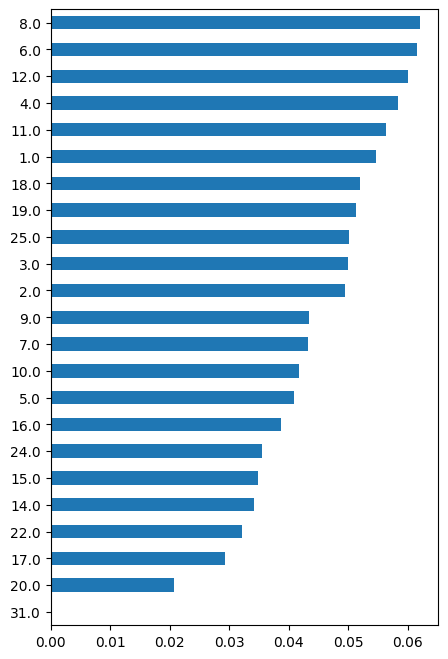

In [32]:
crime_counts = df2022['District'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8))

District number 8 is the district with the most crimes whilast district 20 is the least.

In [33]:
ts=df.groupby('Primary Type').resample('Y').count()

In [34]:
ts.columns

Index(['ID', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Latitude', 'Longitude',
       'Count'],
      dtype='object')

In [38]:
ts=ts['ID']

In [45]:
ts=ts.to_frame()

In [42]:
df['Primary Type'].unique()

array(['BATTERY', 'GAMBLING', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'THEFT', 'ASSAULT', 'NARCOTICS',
       'CRIMINAL SEXUAL ASSAULT', 'DECEPTIVE PRACTICE',
       'WEAPONS VIOLATION', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'BURGLARY', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING',
       'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'PUBLIC INDECENCY',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING'], dtype=object)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


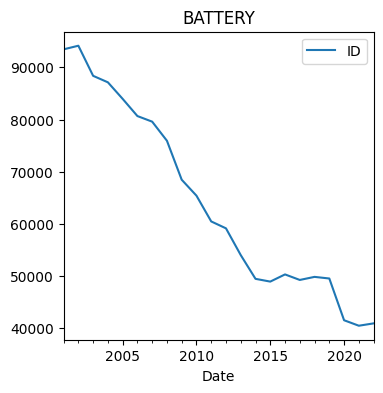

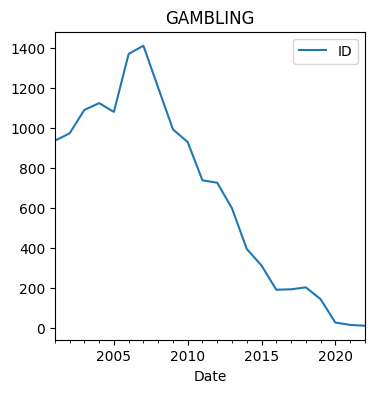

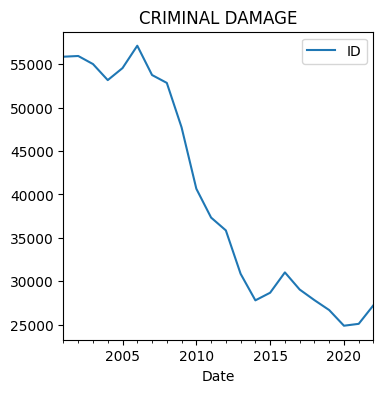

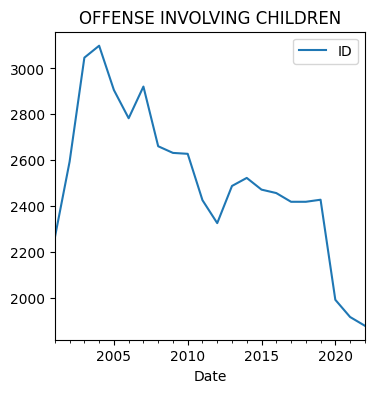

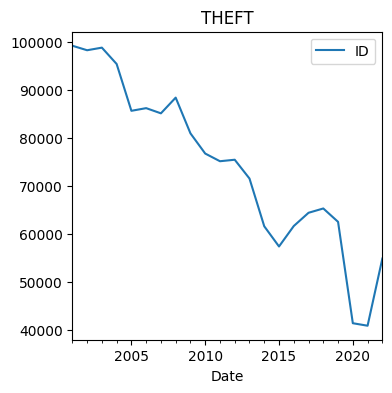

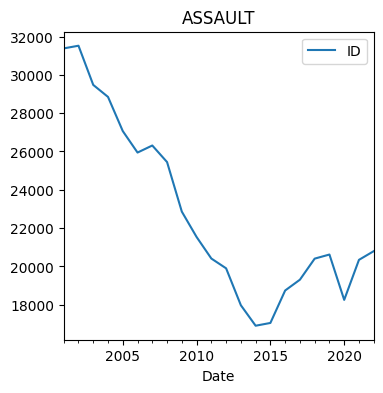

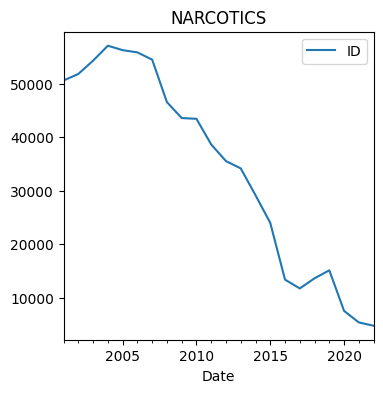

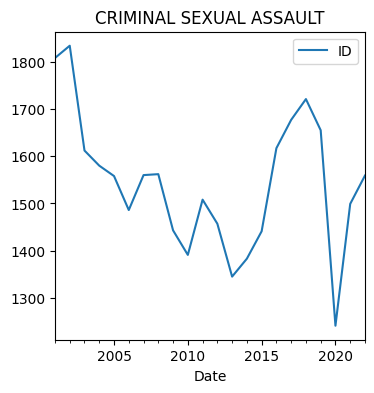

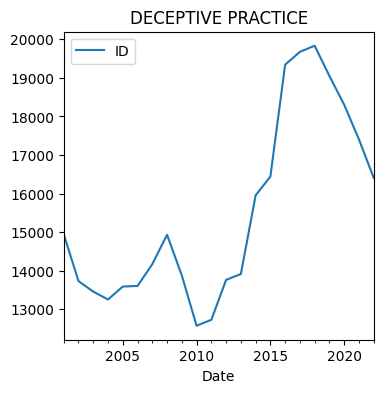

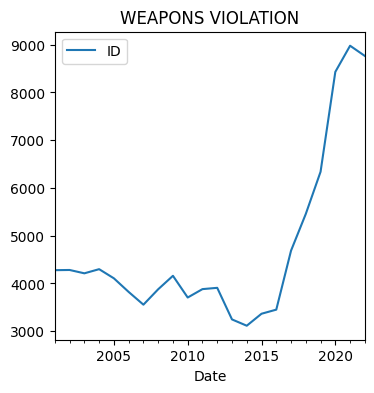

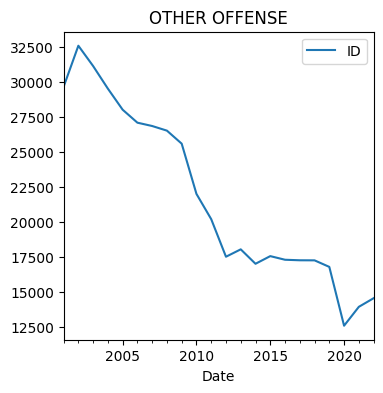

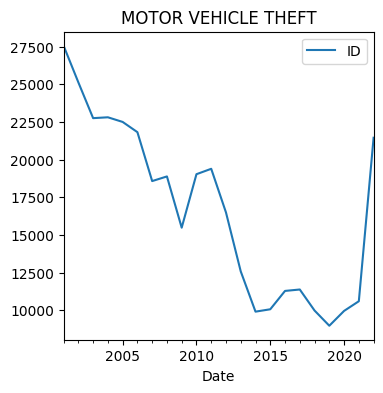

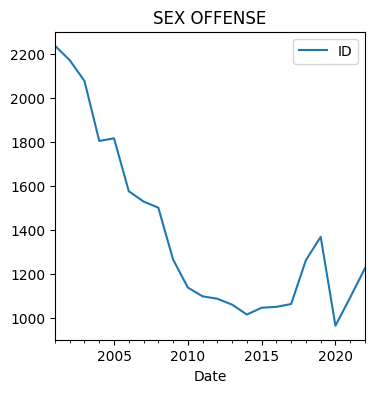

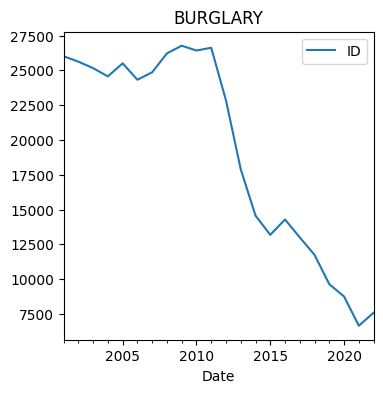

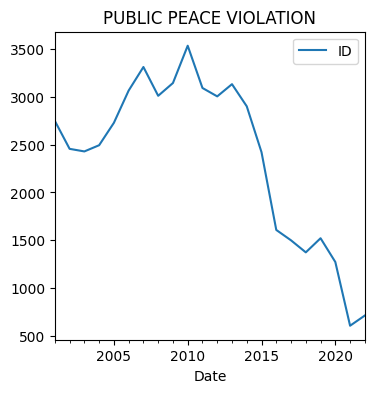

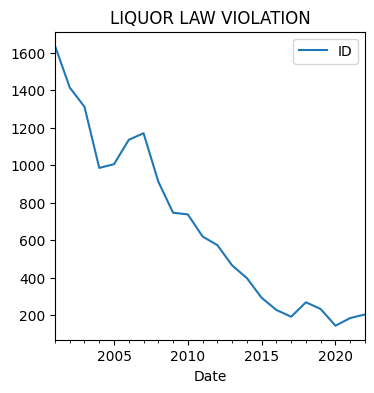

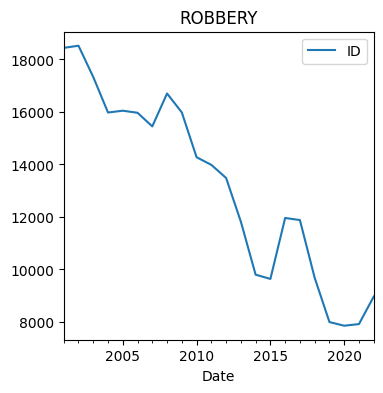

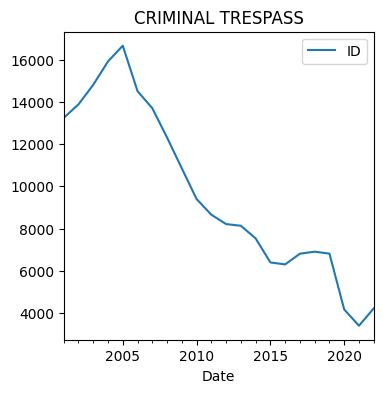

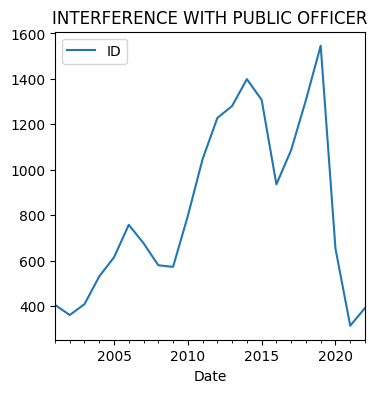

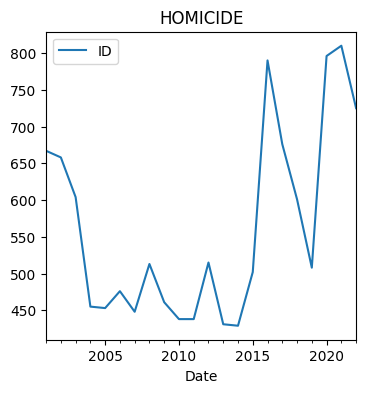

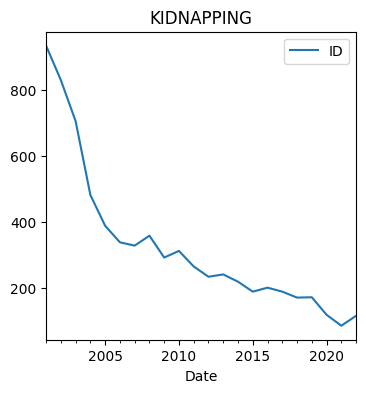

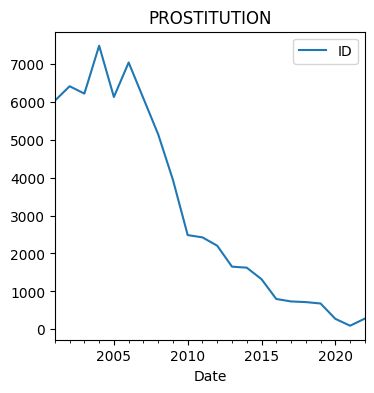

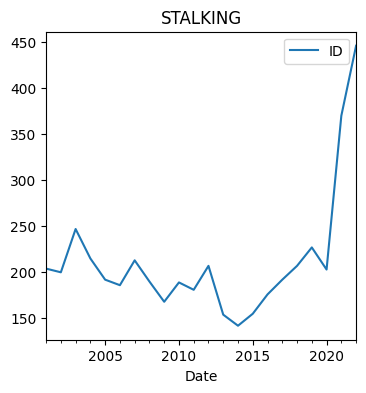

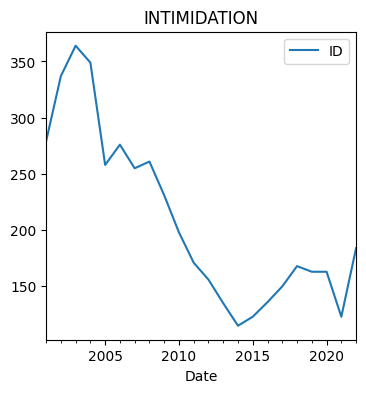

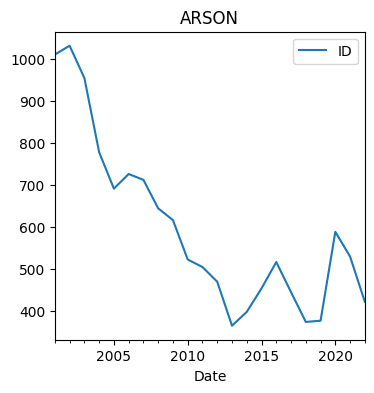

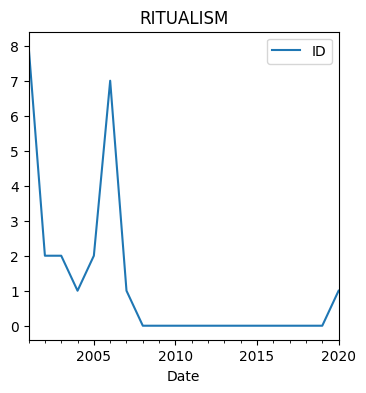

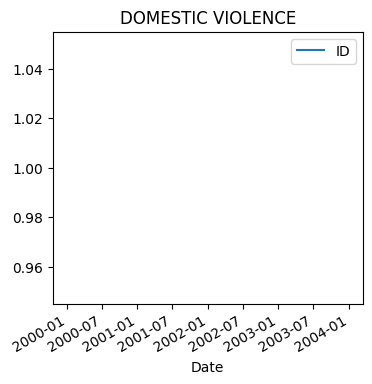

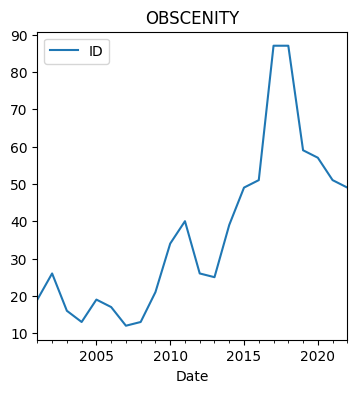

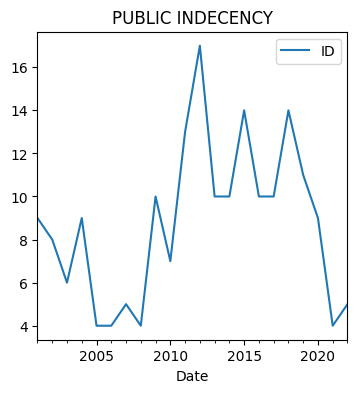

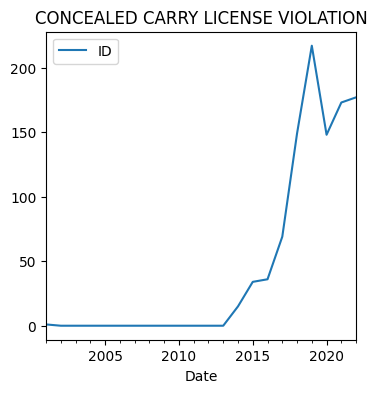

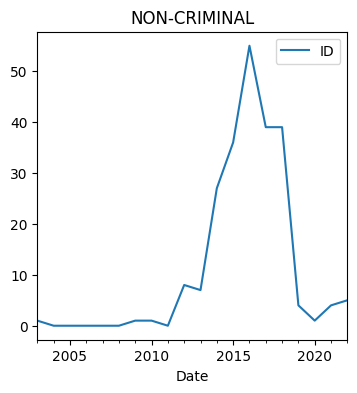

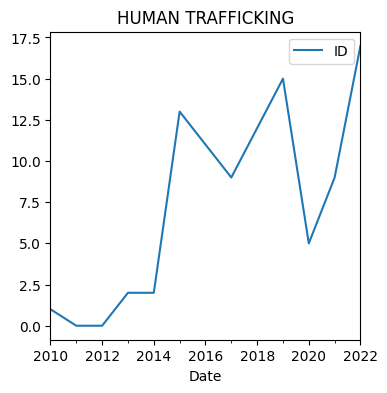

In [46]:
for x in df['Primary Type'].unique():

   ts.loc[x].plot(figsize=(4,4),title=x)


<Axes: title={'center': 'Total Crimes'}, xlabel='Date'>

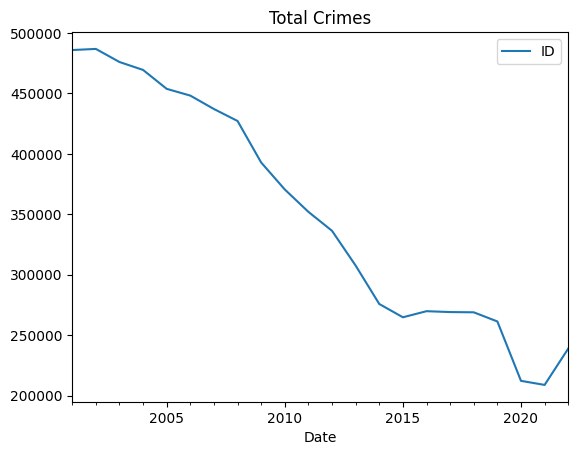

In [47]:
ts.groupby('Date').sum().plot(title='Total Crimes')

Topic 2) Crimes Across the Years:
Is the total number of crimes increasing or decreasing across the years?

The total number of crimes are decreasing.

Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?
